# 해결하고 싶은 문제
- 지연 배송에 영향을 주는 요인을 분석후 개선 점 제시

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

from google.colab import files

%config InlineBackend.figure_format='retina'

sns.set_style("darkgrid")

In [3]:
files.upload()

Saving Study2_Train.csv to Study2_Train.csv


{'Study2_Train.csv': b'\xef\xbb\xbfID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N\r\n1,D,Flight,4,2,177,3,low,F,44,1233,1\r\n2,F,Flight,4,5,216,2,low,M,59,3088,1\r\n3,A,Flight,2,2,183,4,low,M,48,3374,1\r\n4,B,Flight,3,3,176,4,medium,M,10,1177,1\r\n5,C,Flight,2,2,184,3,medium,F,46,2484,1\r\n6,F,Flight,3,1,162,3,medium,F,12,1417,1\r\n7,D,Flight,3,4,250,3,low,F,3,2371,1\r\n8,F,Flight,4,1,233,2,low,F,48,2804,1\r\n9,A,Flight,3,4,150,3,low,F,11,1861,1\r\n10,B,Flight,3,2,164,3,medium,F,29,1187,1\r\n11,C,Flight,3,4,189,2,medium,M,12,2888,1\r\n12,F,Flight,4,5,232,3,medium,F,32,3253,1\r\n13,D,Flight,3,5,198,3,medium,F,1,3667,1\r\n14,F,Flight,4,4,275,3,high,M,29,2602,1\r\n15,A,Flight,4,3,152,3,low,M,43,1009,1\r\n16,B,Flight,4,3,227,3,low,F,45,2707,1\r\n17,C,Flight,3,4,143,2,medium,F,6,1194,1\r\n18,F,Ship,5,5,227,3,medium,M,36,3952,1\r\n19,D,Ship,5,5,239,3,high,

In [4]:
df = pd.read_csv('Study2_Train.csv')

df.set_index('ID', inplace=True)
df.head()

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
ID,,,,,,,,,,,
1,D,Flight,4,2,177,3,low,F,44,1233,1
2,F,Flight,4,5,216,2,low,M,59,3088,1
3,A,Flight,2,2,183,4,low,M,48,3374,1
4,B,Flight,3,3,176,4,medium,M,10,1177,1
5,C,Flight,2,2,184,3,medium,F,46,2484,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10999 entries, 1 to 10999
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Warehouse_block      10999 non-null  object
 1   Mode_of_Shipment     10999 non-null  object
 2   Customer_care_calls  10999 non-null  int64 
 3   Customer_rating      10999 non-null  int64 
 4   Cost_of_the_Product  10999 non-null  int64 
 5   Prior_purchases      10999 non-null  int64 
 6   Product_importance   10999 non-null  object
 7   Gender               10999 non-null  object
 8   Discount_offered     10999 non-null  int64 
 9   Weight_in_gms        10999 non-null  int64 
 10  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(7), object(4)
memory usage: 1.0+ MB


In [6]:
df.describe()

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
count,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000
mean,4.054459,2.990545,210.196836,3.567597,13.373216,3634.016729,0.596691
std,1.141490,1.413603,48.063272,1.522860,16.205527,1635.377251,0.490584
min,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000,0.000000
25%,3.000000,2.000000,169.000000,3.000000,4.000000,1839.500000,0.000000
50%,4.000000,3.000000,214.000000,3.000000,7.000000,4149.000000,1.000000
75%,5.000000,4.000000,251.000000,4.000000,10.000000,5050.000000,1.000000
max,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000,1.000000


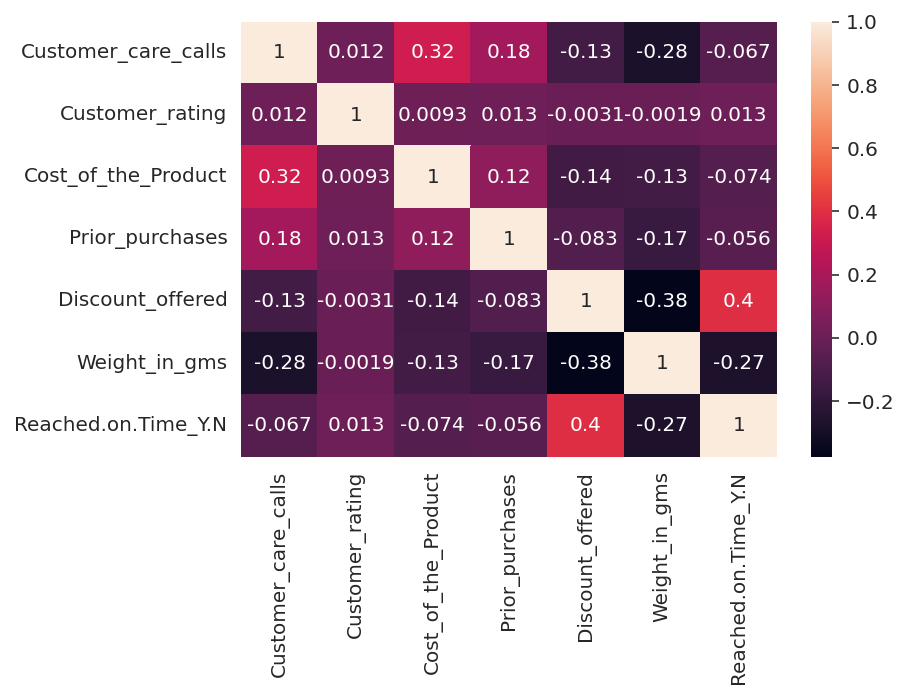

In [7]:
sns.heatmap(df.corr(), annot = True);

## - 평균적으로 60%의 제품은 지연 배송 되었다.

In [8]:
target = 'Reached.on.Time_Y.N'

print(f'평균 배송 지연률 : {df[target].mean()}')

평균 배송 지연률 : 0.5966906082371125


## 지연 배송 유무와 연관 된 feature 찾기
### * paired t-test
int 변수에 대해서
1. 정규성 검사
2. 등분산성 검사
3. test

### * two sample chi2-test
object 변수에 대해서

In [9]:
# 정시배송, 지연배송 데이터 분리
df_Y = df[df['Reached.on.Time_Y.N'] == 1]
df_N = df[df['Reached.on.Time_Y.N'] == 0]
target_col = []


In [10]:
# 정규성 검정
def Normally(data):
    for col in data.select_dtypes('int').columns:
        skew = stats.skew(data[col])
        kurtosis = stats.kurtosis(data[col], fisher=True)
        
        if (abs(skew) < 3) & (abs(kurtosis) < 7):
            print(col)

In [11]:
Normally(df_Y)

Customer_care_calls
Customer_rating
Cost_of_the_Product
Prior_purchases
Discount_offered
Weight_in_gms
Reached.on.Time_Y.N


In [12]:
Normally(df_N)

Customer_care_calls
Customer_rating
Cost_of_the_Product
Prior_purchases
Discount_offered
Weight_in_gms
Reached.on.Time_Y.N


In [13]:
print('Y')
for col in df.select_dtypes('int').columns:
    print(col, stats.shapiro(df_Y[col])[1])

print('N')
for col in df.select_dtypes('int').columns:
    print(col, stats.shapiro(df_N[col])[1])

Y
Customer_care_calls 0.0
Customer_rating 0.0
Cost_of_the_Product 8.600646762810311e-34
Prior_purchases 0.0
Discount_offered 0.0
Weight_in_gms 0.0
Reached.on.Time_Y.N 1.0
N
Customer_care_calls 2.620428128287408e-43
Customer_rating 0.0
Cost_of_the_Product 1.142949986622032e-28
Prior_purchases 0.0
Discount_offered 2.24877574957918e-40
Weight_in_gms 0.0
Reached.on.Time_Y.N 1.0


/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:1676: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:1673: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "


In [14]:
# 등분산성 검정

for col in df.select_dtypes('int').columns:
    print(col, stats.levene(df_Y[col], df_N[col])[1])

Customer_care_calls 0.018896544181607668
Customer_rating 0.6046648639711958
Cost_of_the_Product 0.06658279183784283
Prior_purchases 1.6479017931741277e-06
Discount_offered 0.0
Weight_in_gms 1.8953946005842356e-43
Reached.on.Time_Y.N nan


/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:2369: RuntimeWarning: invalid value encountered in double_scalars
  W = numer / denom


In [15]:
# two sample t-test
for col in df.select_dtypes('int').columns:
    tvalue, pvalue = stats.ttest_ind(df_Y[col], df_N[col])
    if pvalue < 0.01:
        target_col += [col]

In [16]:
# 범주형 컬럼 two sample chi2-test
for col in df.select_dtypes('object').columns:
    obs1 = pd.crosstab(df[col], df[target])
    chi2, pvalue, dof, expected = stats.chi2_contingency(obs1, correction = False)
    if pvalue < 0.01:
        target_col += [col]

target_col        

['Customer_care_calls',
 'Cost_of_the_Product',
 'Prior_purchases',
 'Discount_offered',
 'Weight_in_gms',
 'Reached.on.Time_Y.N',
 'Product_importance']

## 연관 된 컬럼 시각화
횟수와같은 수치형 컬럼을 포함하여 수치의 변화에 따른 평균 지연배송 확률의 추이를 보기 위해서 lineplot을 사용

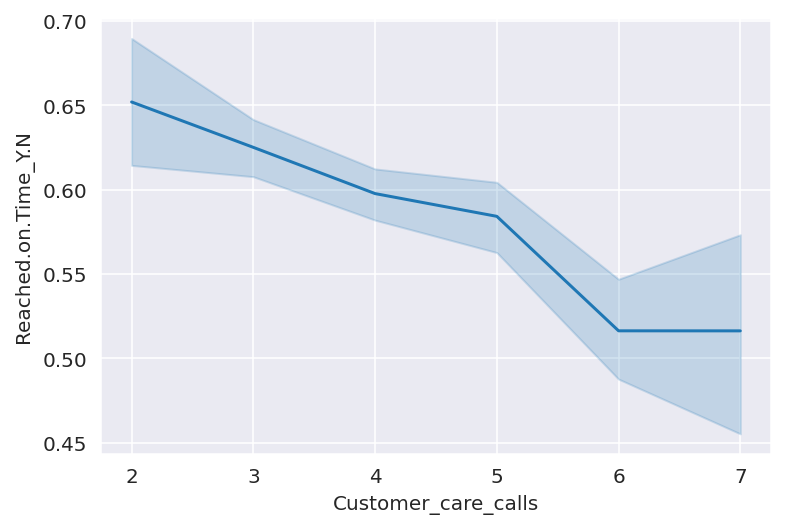

In [17]:
sns.lineplot(data=df, x='Customer_care_calls', y='Reached.on.Time_Y.N');

In [18]:
df[df['Customer_care_calls'] == 2].describe()

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
count,638.0,638.000000,638.000000,638.000000,638.000000,638.000000,638.000000
mean,2.0,3.017241,189.888715,3.432602,16.774295,3682.147335,0.652038
std,0.0,1.434499,49.189460,1.436572,18.469012,1675.380727,0.476698
min,2.0,1.000000,96.000000,2.000000,1.000000,1023.000000,0.000000
25%,2.0,2.000000,152.000000,3.000000,4.000000,1809.250000,0.000000
50%,2.0,3.000000,182.000000,3.000000,8.000000,4164.000000,1.000000
75%,2.0,4.000000,231.750000,4.000000,24.750000,5069.250000,1.000000
max,2.0,5.000000,310.000000,10.000000,65.000000,7846.000000,1.000000


In [19]:
df[df['Customer_care_calls'] == 7].describe()

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
count,246.0,246.000000,246.000000,246.000000,246.000000,246.000000,246.000000
mean,7.0,2.995935,277.337398,4.126016,6.463415,1479.577236,0.516260
std,0.0,1.463844,27.897699,0.378469,6.461557,284.441207,0.500754
min,7.0,1.000000,133.000000,3.000000,1.000000,1003.000000,0.000000
25%,7.0,2.000000,262.500000,4.000000,3.000000,1235.750000,0.000000
50%,7.0,3.000000,282.000000,4.000000,6.000000,1478.500000,1.000000
75%,7.0,4.000000,296.000000,4.000000,8.000000,1733.000000,1.000000
max,7.0,5.000000,310.000000,5.000000,61.000000,1989.000000,1.000000


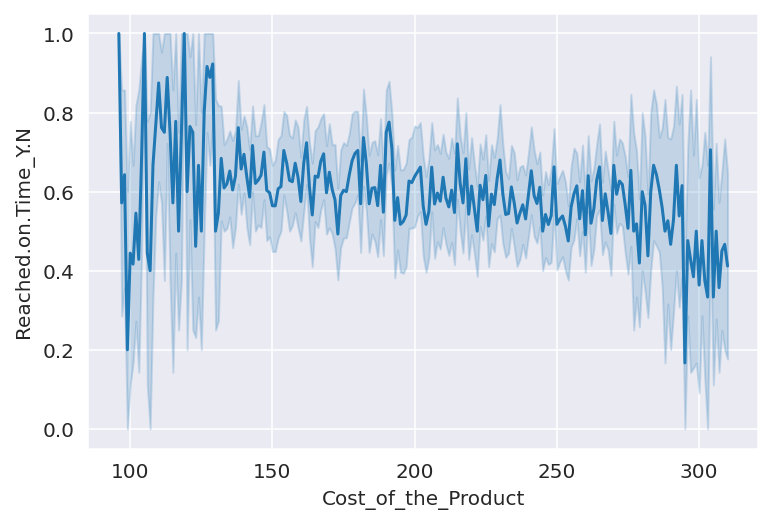

In [20]:
sns.lineplot(data=df, x='Cost_of_the_Product', y='Reached.on.Time_Y.N');

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


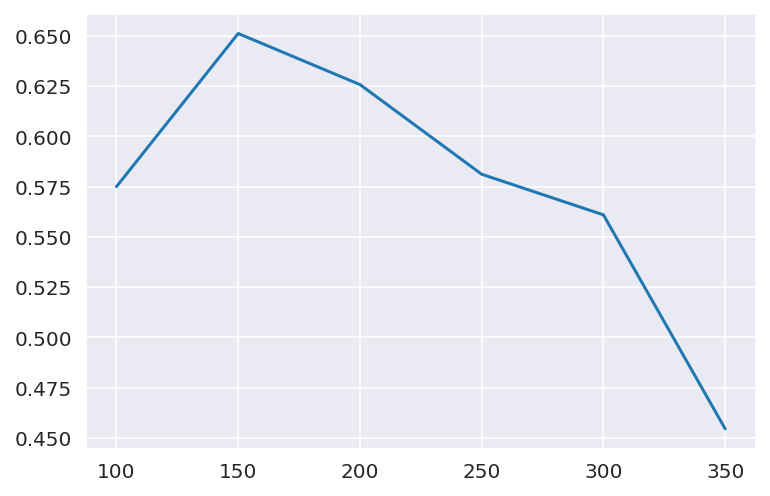

In [21]:
x = []
y = []

for ran in range(50, 350, 50):
    start = ran
    end = ran + 50
    condition = df[(df['Cost_of_the_Product'] > start) & (df['Cost_of_the_Product'] <= end)].index
    x += [end]
    y += [df.loc[condition, 'Reached.on.Time_Y.N'].mean()]

sns.lineplot(x, y);

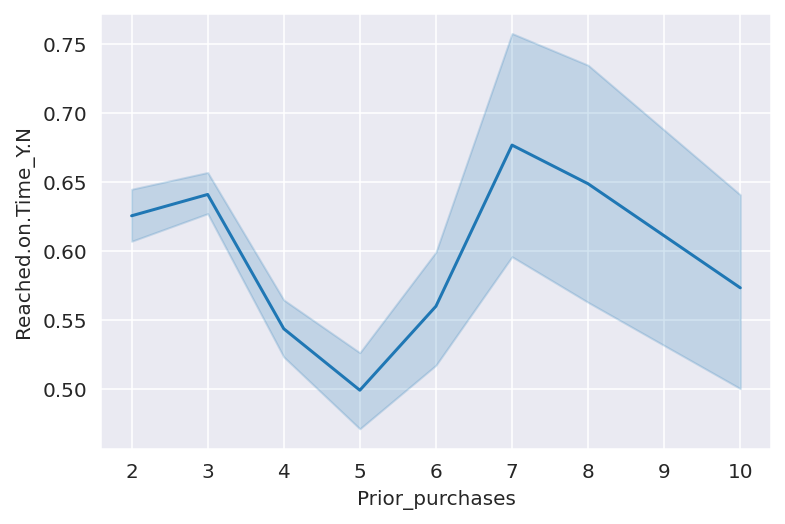

In [22]:
sns.lineplot(data=df, x='Prior_purchases', y='Reached.on.Time_Y.N');

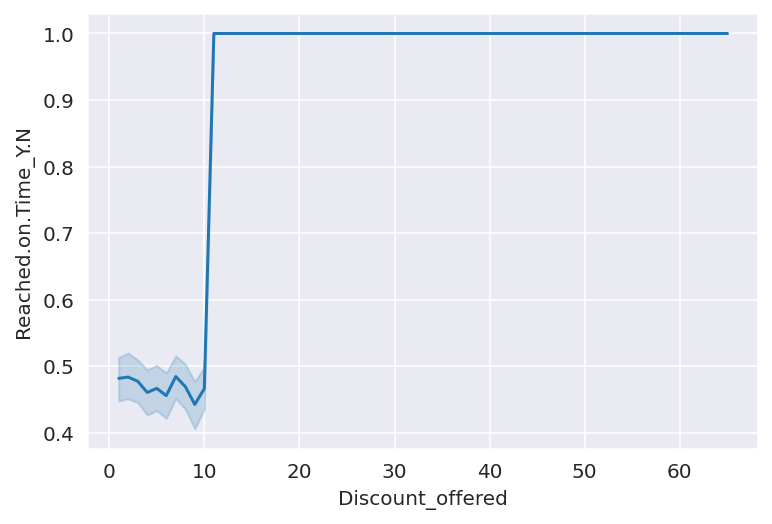

In [23]:
sns.lineplot(data=df, x='Discount_offered', y='Reached.on.Time_Y.N');

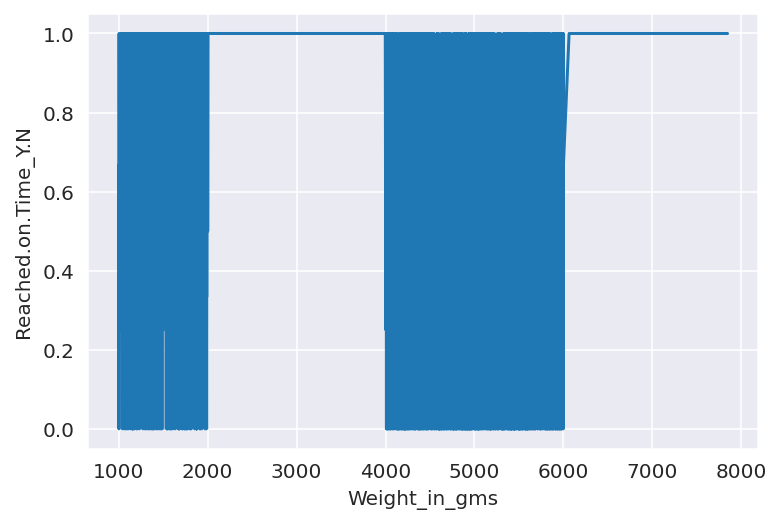

In [24]:
sns.lineplot(data=df, x='Weight_in_gms', y='Reached.on.Time_Y.N');

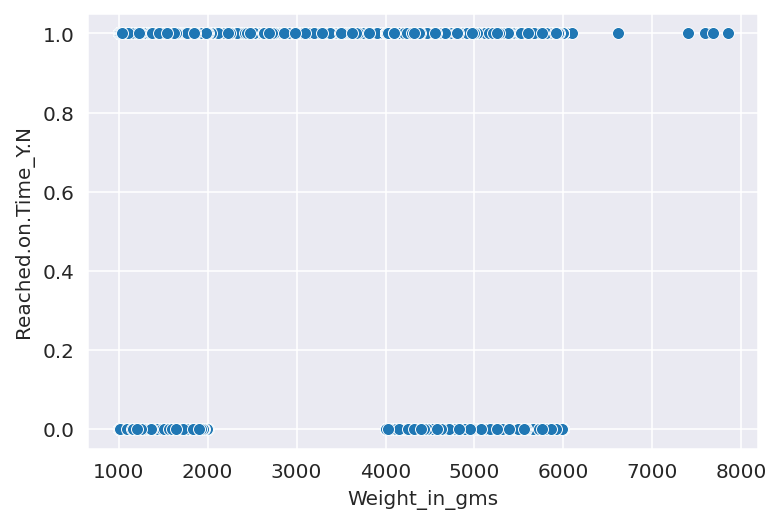

In [25]:
df_w = df.loc[:,['Weight_in_gms','Reached.on.Time_Y.N']]
sns.scatterplot(x='Weight_in_gms' , y='Reached.on.Time_Y.N', data = df_w);

In [26]:
for x in range(0, 8000, 2000):
    start = x
    end = x + 2000
    condition = df[(df['Weight_in_gms'] > start) & (df['Weight_in_gms'] < end)]
    print(f'{start}~{end} : ', round(condition['Reached.on.Time_Y.N'].mean(), 2))
    print('물량 비율 : ', round(len(condition) / len(df), 2))

0~2000 :  0.68
물량 비율 :  0.29
2000~4000 :  1.0
물량 비율 :  0.16
4000~6000 :  0.43
물량 비율 :  0.54
6000~8000 :  1.0
물량 비율 :  0.0


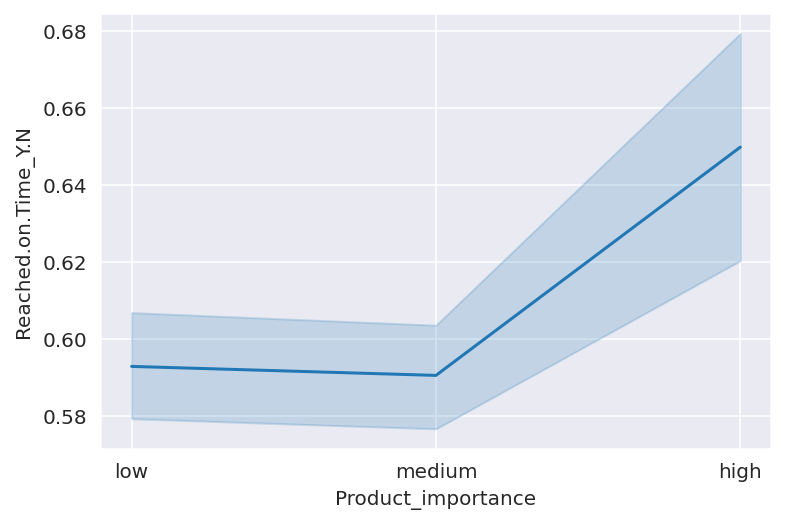

In [27]:
sns.lineplot(data=df, x='Product_importance', y='Reached.on.Time_Y.N');

 - customer care calls - 문의 전화가 많은 제품일 수록 정시 지연 배송 확률이 낮아진다.(전화 횟수가 많을 수록 평균 제품 가격이 높아진다.)

 - cost of the product - 가격이 높아 질 수록 지연 배송 확률이 감소 하였다.

 - discount offered - 할인 금액이 11이상이면 100% 지연 배송 되었다.

 - Prior purchases - 그래프의 굴곡의 변화는 급격하여 최대 약 20%까지 차이가 나지만 어떤 요인이 차이를 주는지 파악이 안됨
    
 - weight in gms - 0 ~ 2000/ 6000~8000 구간의 제품은 100% 지연배송 되었다.(할인이 11이상 되었다)

 - product inprotance - 상품 중요도가 mediumd에서 high로 갈 때 지연확률이 증가한다.


 ## 제품의 할인된 시점은 어떻게 되는가?

 해당 데이터는 전자 제품을 판매하는 전자 상거래 회사의 데이터이고, 할인은 배송의 할인이 아니라 제품 자체에 대한 할인이다.

할인은 지연 배송이 되었으면 100%로 11이상 되었다./ 정시 배송 된 제품은 100%로 10이하

그렇다고 정시 배송이 된 제품이 할인이 안된 것은 아님

그렇다면 할인 금액은 지연배송 + a이다.

할인 금액이 정해지는 시점은 언제인가?

1. 결제 전 회사가 지연 배송 확률을 완벽하게 예측 할 수있는 모델이 있어서 지연 배송이 된다고 예측된 제품에 대해서 할인을 미리 제공함
2. 배송 도착 후 지연 배송의 여부에 따라 제품 금액을 할인해서 돌려줌

1번 가설은 현실적으로 어렵기 때문에 2번 가설 채택 한다면,

시간적으로 할인 금액은 배송 지연 여부를 결정하는 요소가 아님

-> 지연 배송 여부에 따라 할인 금액이 정해지는 것이지 할인 금액에 따라 지연 배송이 결정 되는 것이 아니다.

## 지연 배송률 100%인 무게 구간과 아닌 무게 구간의 지연 배송의 차이는 다른 특성에 의해서 결정 되었을까?
## 지연 배송률의 차이는 무게 구간에 의해서만 결정 되는가?


# 무게 구간 별 분석
무게는 변화를 보인 2000단위로 구분하는 특성 생성



In [28]:
df.loc[df['Weight_in_gms'] <= 2000, 'gms_2000'] = '02'
df.loc[(df['Weight_in_gms'] > 2000) & (df['Weight_in_gms'] < 4000), 'gms_2000'] = '24'
df.loc[(df['Weight_in_gms'] >= 4000) & (df['Weight_in_gms'] <= 6000), 'gms_2000'] = '46'
df.loc[(df['Weight_in_gms'] > 6000) & (df['Weight_in_gms'] < 7999), 'gms_2000'] = '68'

In [52]:
df['gms_2000'].value_counts(normalize=True)

46    0.541867
02    0.295027
24    0.162378
68    0.000727
Name: gms_2000, dtype: float64

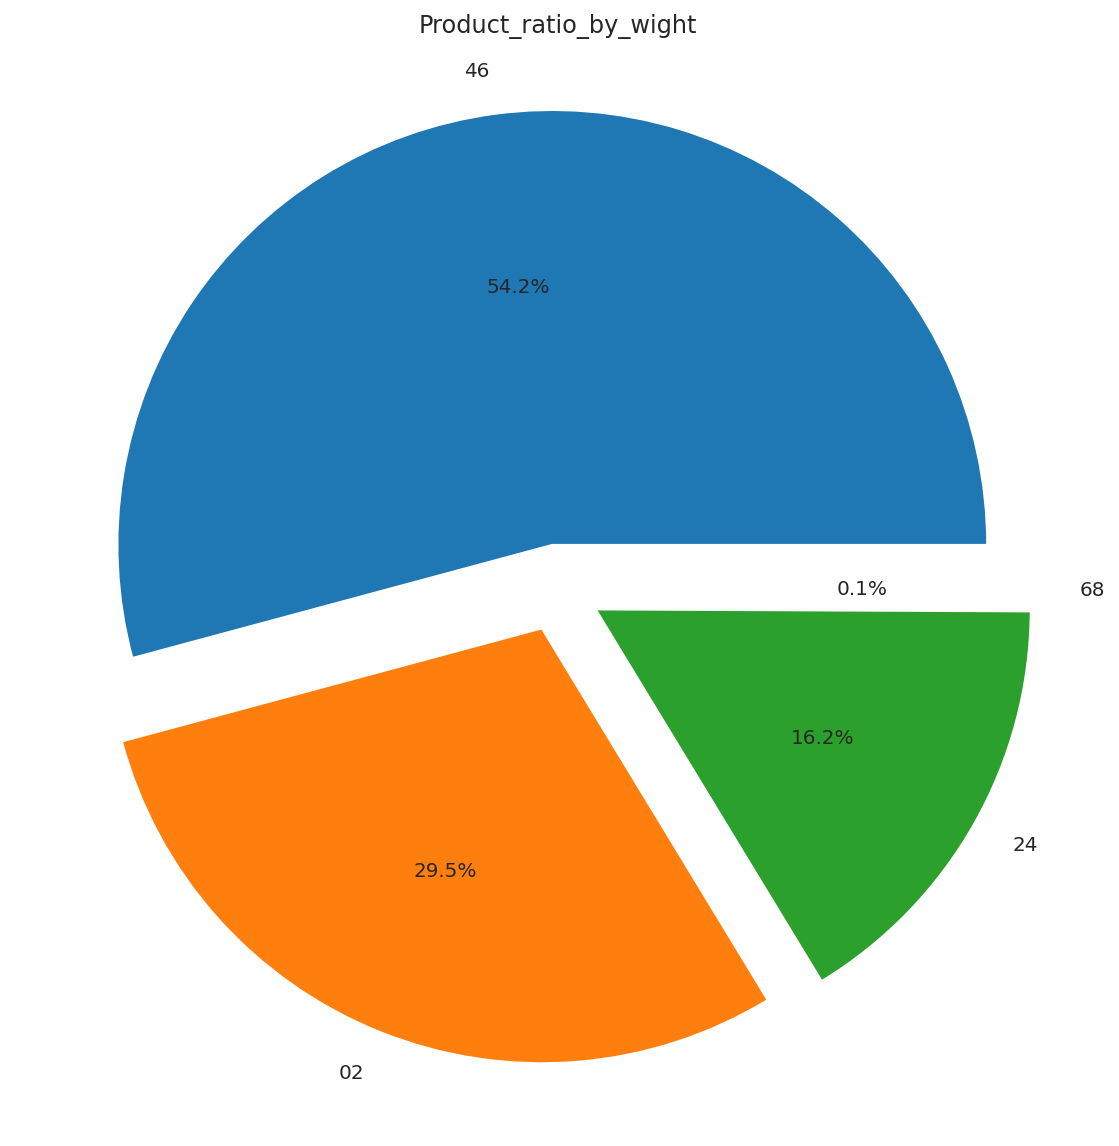

In [51]:
fig=plt.figure(figsize=(12,10))

ax = fig.add_subplot(111)
ratio = df['gms_2000'].value_counts(normalize=True)
explode = [0.1, 0.1, 0.1, 0.1]
label = ratio.index
ax.pie(ratio, labels=label, autopct='%.1f%%', explode=explode)
ax.set_title('Product_ratio_by_wight')
plt.show();

### 구간별 배송의 차이는 물량의 차이인가?

직관적으로 생각 했을 때 물량이 많다면 지연 배송이 될 확률이 높다고 생각 할 수 있다.

하지만, 지연 배송률이 100%인 2000\~4000구간과 6000~8000구간의 물량이 비교적 적다는 것을 확인 할 수 있음

따라서 
1. '해당 회사는 0\~2000 구간의 제품과 4000~6000의 구간의 제품을 주로 판매하며 나머지 무게 구간의 배송 시스템에 문제가 있거나, 소규모로 운영 된다,' 라는 가설을 세울 수 있다


In [91]:
print(len(df[df['gms_2000'] =='68']))
df.drop(index=df[df['Weight_in_gms'] > 6000].index, inplace=True)

8


In [131]:
df_02_46 = df[df['gms_2000'].str.contains('02|46')]
df_24 = df.drop(df_02_46.index)

df_02_46_1 = df[df['Reached.on.Time_Y.N'] == 1]
df_02_46_0 = df[df['Reached.on.Time_Y.N'] == 0]

print(df_02_46['gms_2000'].unique())
print(df_24['gms_2000'].unique())

['02' '46']
['24']


In [94]:
df_02_46.describe()

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
count,9205.000000,9205.000000,9205.000000,9205.000000,9205.000000,9205.000000,9205.000000
mean,4.103639,2.988159,206.946442,3.620206,9.542640,3753.912982,0.518088
std,1.168967,1.412511,50.298896,1.511589,12.467526,1739.683114,0.499700
min,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000,0.000000
25%,3.000000,2.000000,162.000000,3.000000,3.000000,1705.000000,0.000000
50%,4.000000,3.000000,209.000000,3.000000,6.000000,4437.000000,1.000000
75%,5.000000,4.000000,251.000000,4.000000,9.000000,5210.000000,1.000000
max,7.000000,5.000000,310.000000,10.000000,65.000000,6000.000000,1.000000


In [95]:
df_24.describe()

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
count,1786.000000,1786.000000,1786.000000,1786.000000,1786.000000,1786.000000,1786.0
mean,3.810190,3.003919,227.235162,3.298992,33.055991,3000.471445,1.0
std,0.943993,1.420335,28.710330,1.555390,18.751335,583.497470,0.0
min,2.000000,1.000000,181.000000,2.000000,1.000000,2003.000000,1.0
25%,3.000000,2.000000,202.000000,2.000000,17.000000,2493.000000,1.0
50%,4.000000,3.000000,226.500000,3.000000,34.000000,2994.000000,1.0
75%,4.000000,4.000000,252.000000,4.000000,49.000000,3516.000000,1.0
max,6.000000,5.000000,286.000000,10.000000,65.000000,3997.000000,1.0


In [160]:
df.columns

Index(['Warehouse_block', 'Mode_of_Shipment', 'Customer_care_calls',
       'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases',
       'Product_importance', 'Gender', 'Discount_offered', 'Weight_in_gms',
       'Reached.on.Time_Y.N', 'gms_2000'],
      dtype='object')

In [150]:
# def ratioo(data, column):
#     for i in data[column].unique():
#         globals()['ratio_{}'.format(i)] = len(data[data[column].str.contains(i)]) / len(data[column])
#         print(globals()['ratio_{}'.format(i)])

# df_02_46['Warehouse_block'].value_counts()

In [129]:
def pie_plt(column, df1, df2):
    fig=plt.figure(figsize=(15,8))

    ax_1=fig.add_subplot(121)
    ratio = df1[column].value_counts(normalize=True)
    ax_1.pie(ratio, labels=ratio.index, autopct='%.1f%%')
    ax_1.set_title("weight_02_46")


    ax_2=fig.add_subplot(122)
    ratio = df2[column].value_counts(normalize=True)
    ax_2.pie(ratio, labels=ratio.index, autopct='%.1f%%')
    ax_2.set_title("weight_24")

    fig.suptitle(column)
    plt.show()

# 파이마다 색과 라벨이 일치하지 않으니 주의!

Text(0.5, 1.0, 'weight_all')

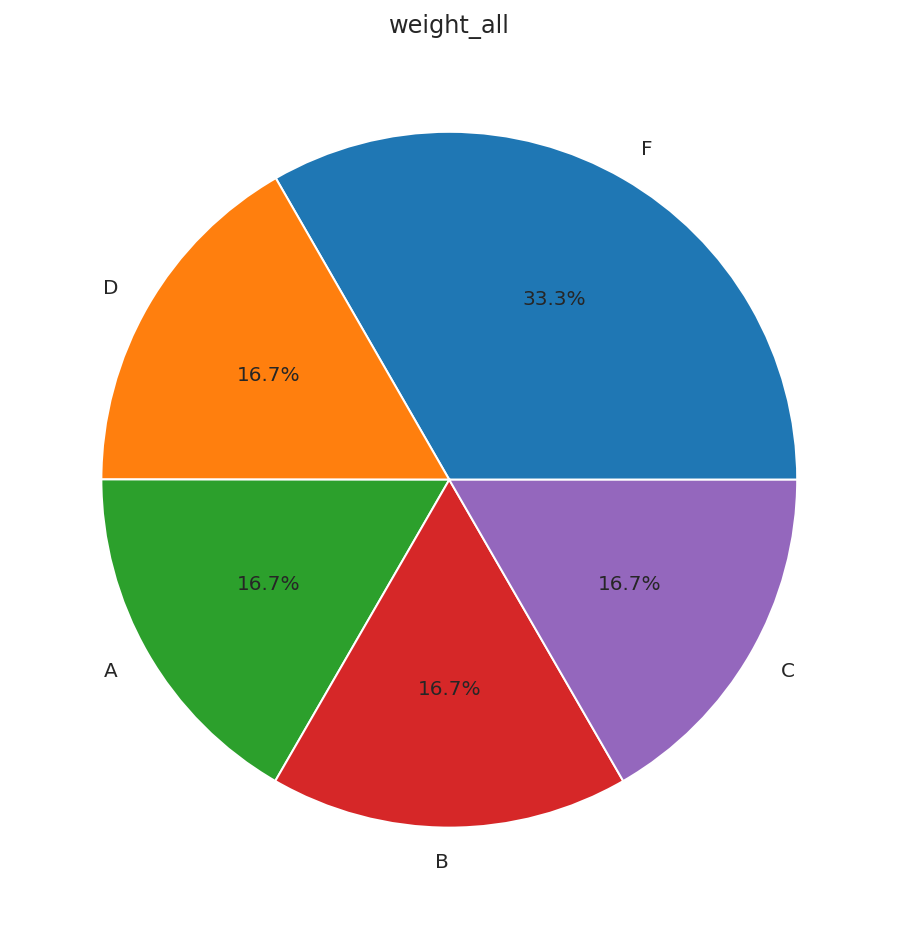

In [178]:
fig=plt.figure(figsize=(15,8))

ax_1=fig.add_subplot(111)
ratio = df['Warehouse_block'].value_counts(normalize=True)
ax_1.pie(ratio, labels=ratio.index, autopct='%.1f%%')
ax_1.set_title("weight_all")

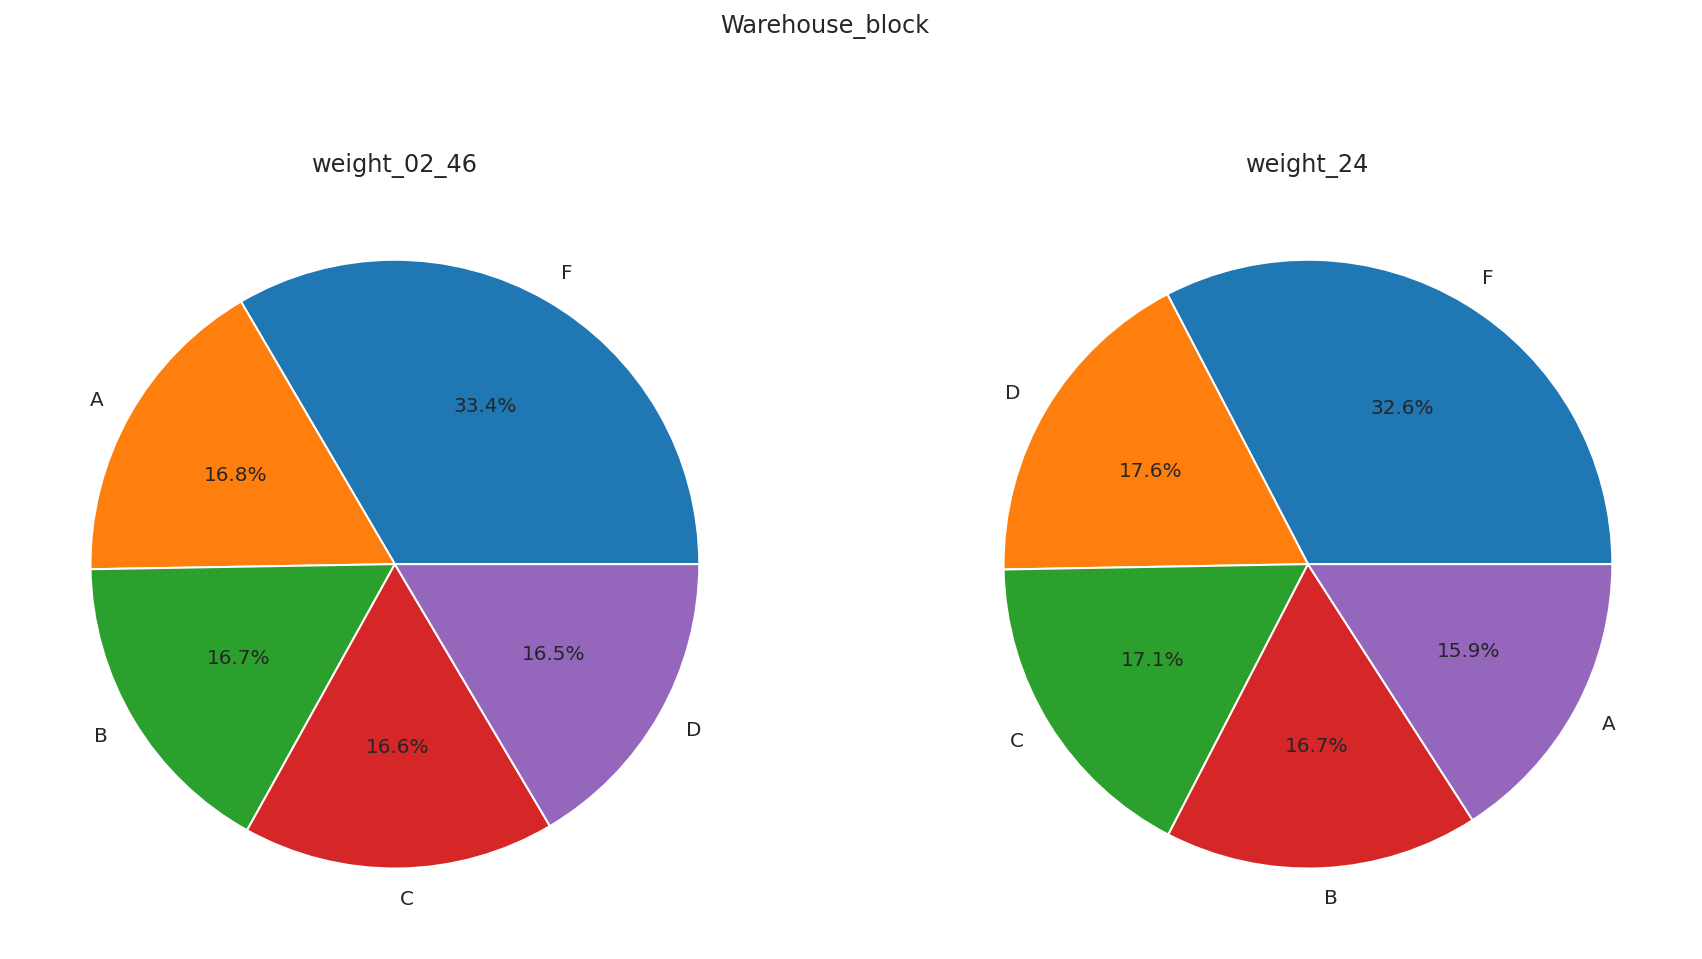

In [134]:
pie_plt('Warehouse_block', df_02_46, df_24)

Text(0.5, 1.0, 'Shipment_all')

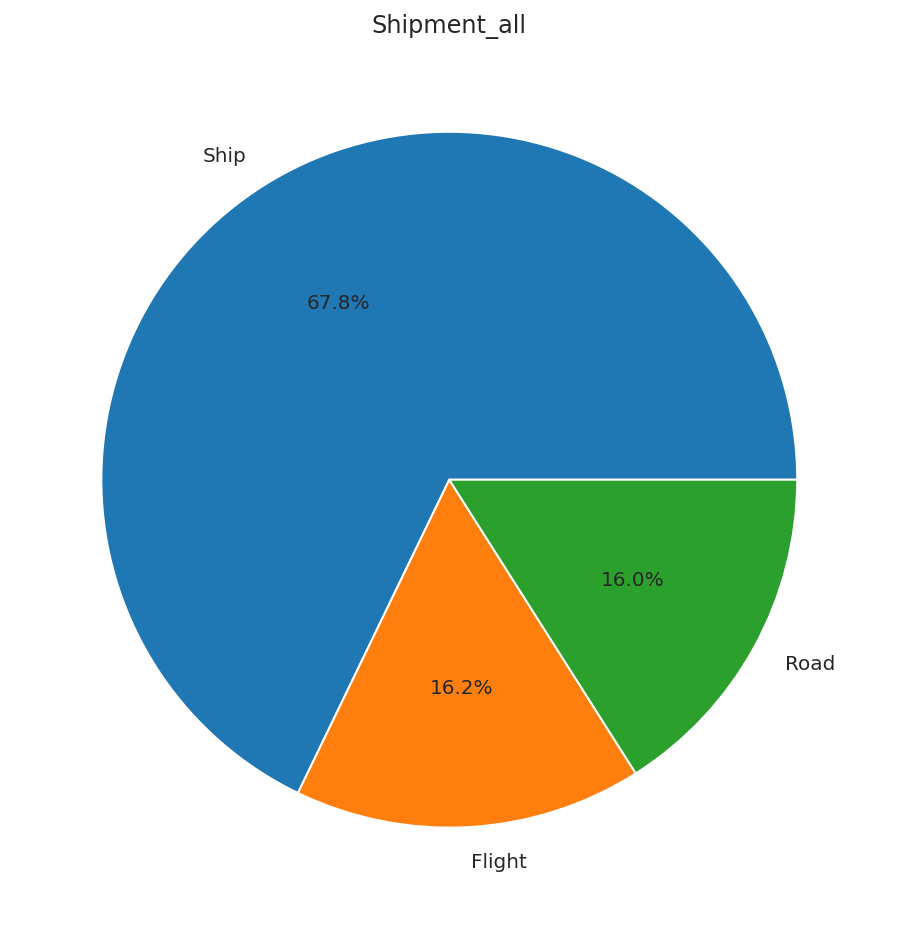

In [179]:
fig=plt.figure(figsize=(15,8))

ax_1=fig.add_subplot(111)
ratio = df['Mode_of_Shipment'].value_counts(normalize=True)
ax_1.pie(ratio, labels=ratio.index, autopct='%.1f%%')
ax_1.set_title("Shipment_all")

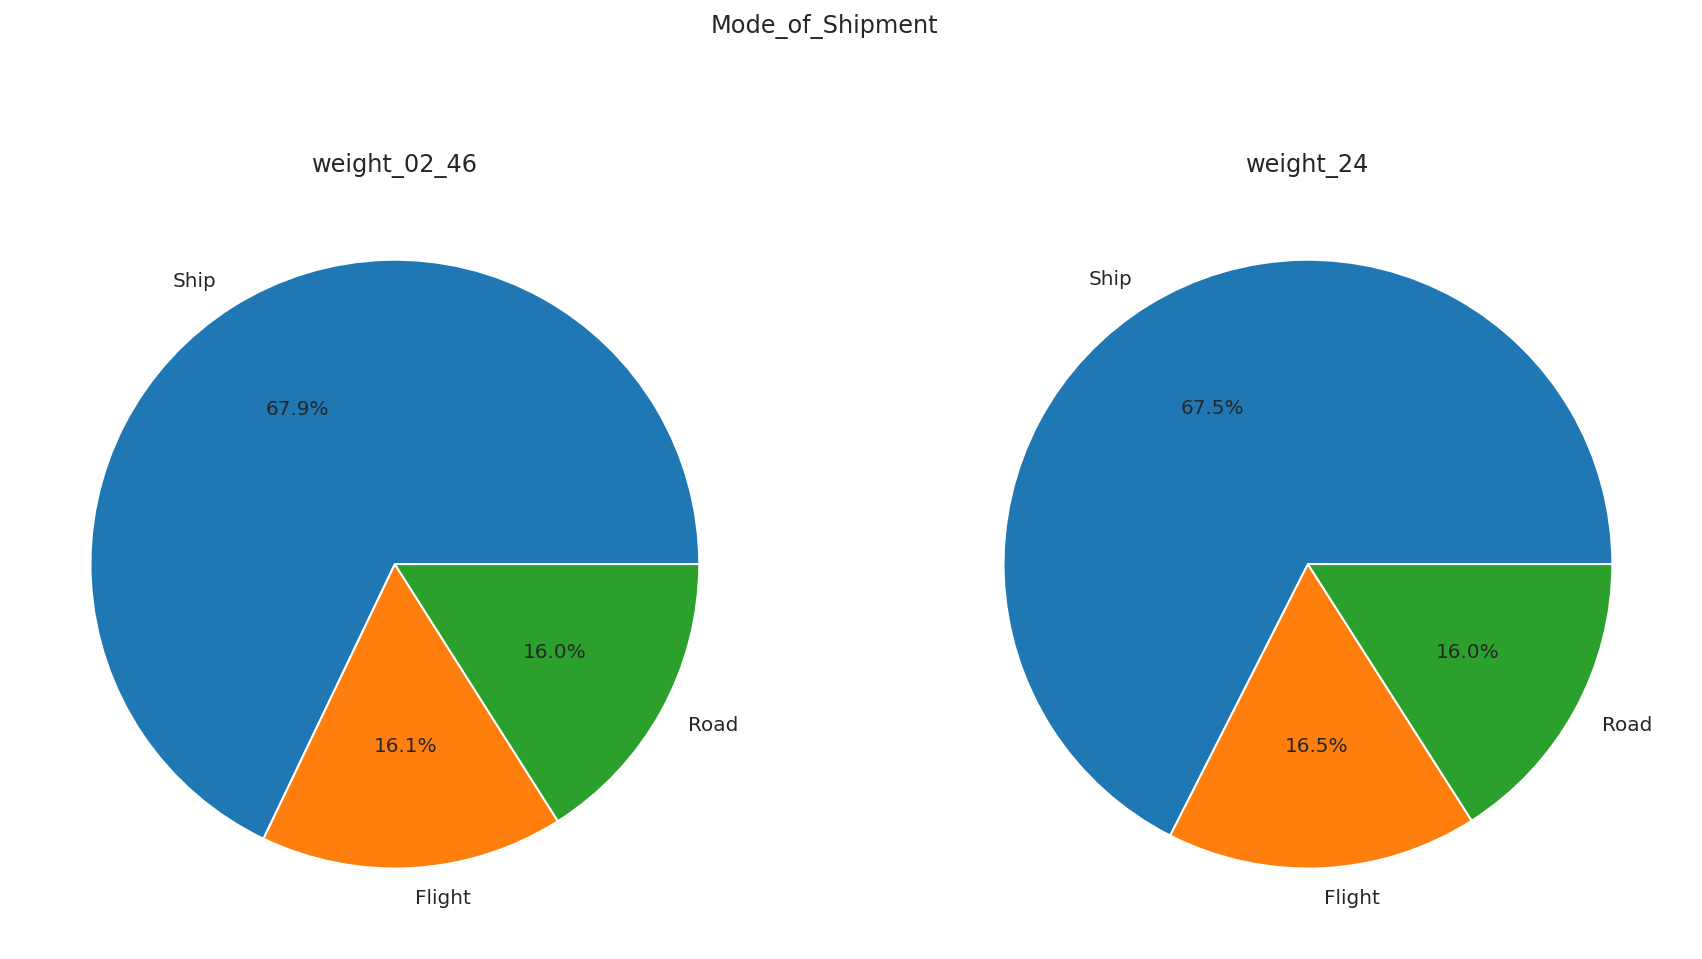

In [200]:
pie_plt('Mode_of_Shipment', df_02_46, df_24)

Text(0.5, 1.0, '\x08Gender_all')

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8 missing from current font.
  font.set_text(s, 0, flags=flags)


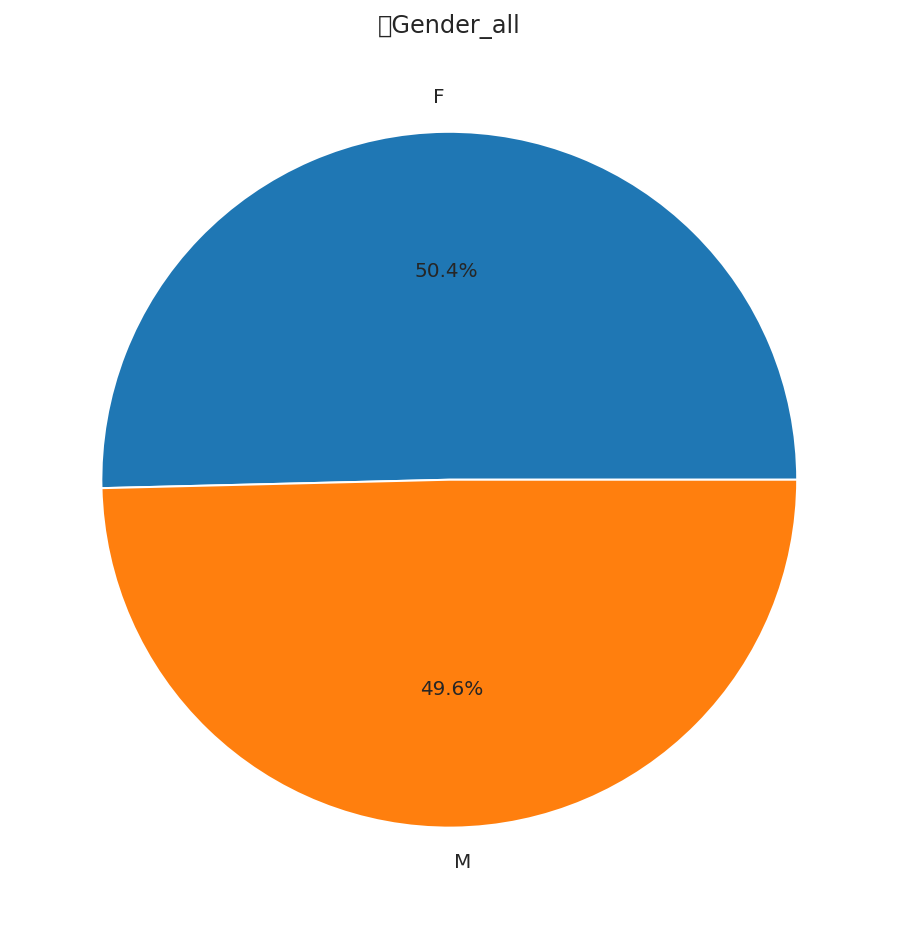

In [202]:
fig=plt.figure(figsize=(15,8))

ax_1=fig.add_subplot(111)
ratio = df['Gender'].value_counts(normalize=True)
ax_1.pie(ratio, labels=ratio.index, autopct='%.1f%%')
ax_1.set_title("Gender_all")

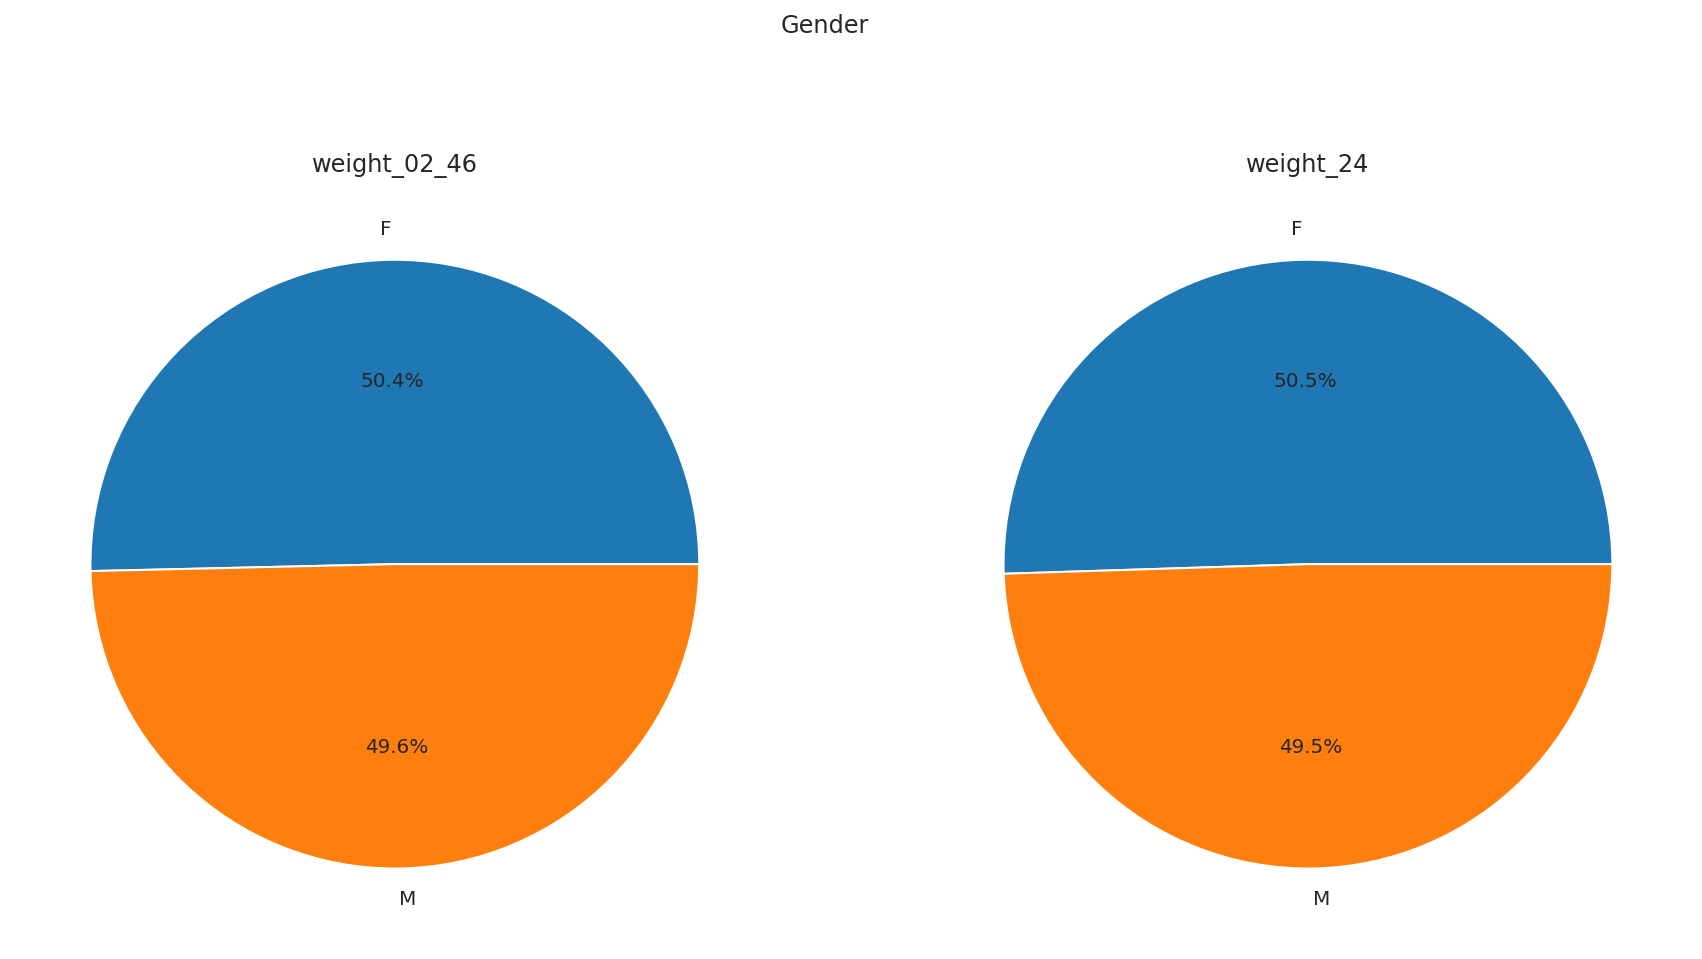

In [203]:
pie_plt('Gender', df_02_46, df_24)

Text(0.5, 1.0, 'Product_importance_all')

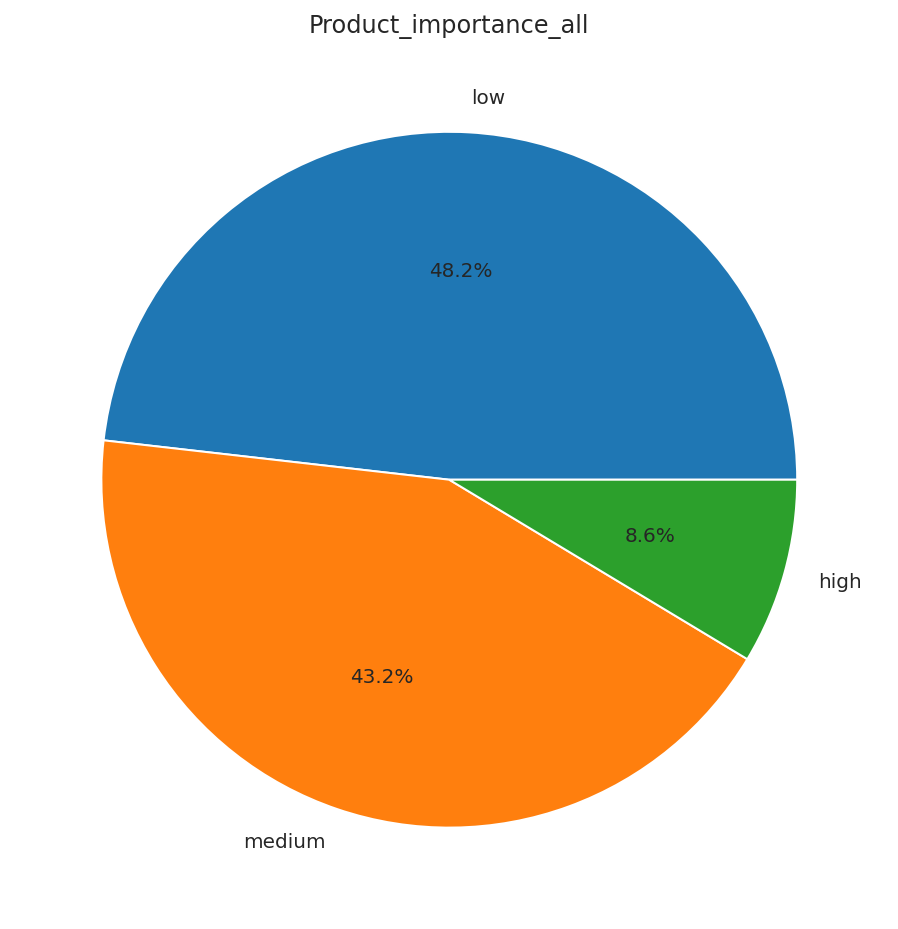

In [204]:
fig=plt.figure(figsize=(15,8))

ax_1=fig.add_subplot(111)
ratio = df['Product_importance'].value_counts(normalize=True)
ax_1.pie(ratio, labels=ratio.index, autopct='%.1f%%')
ax_1.set_title("Product_importance_all")

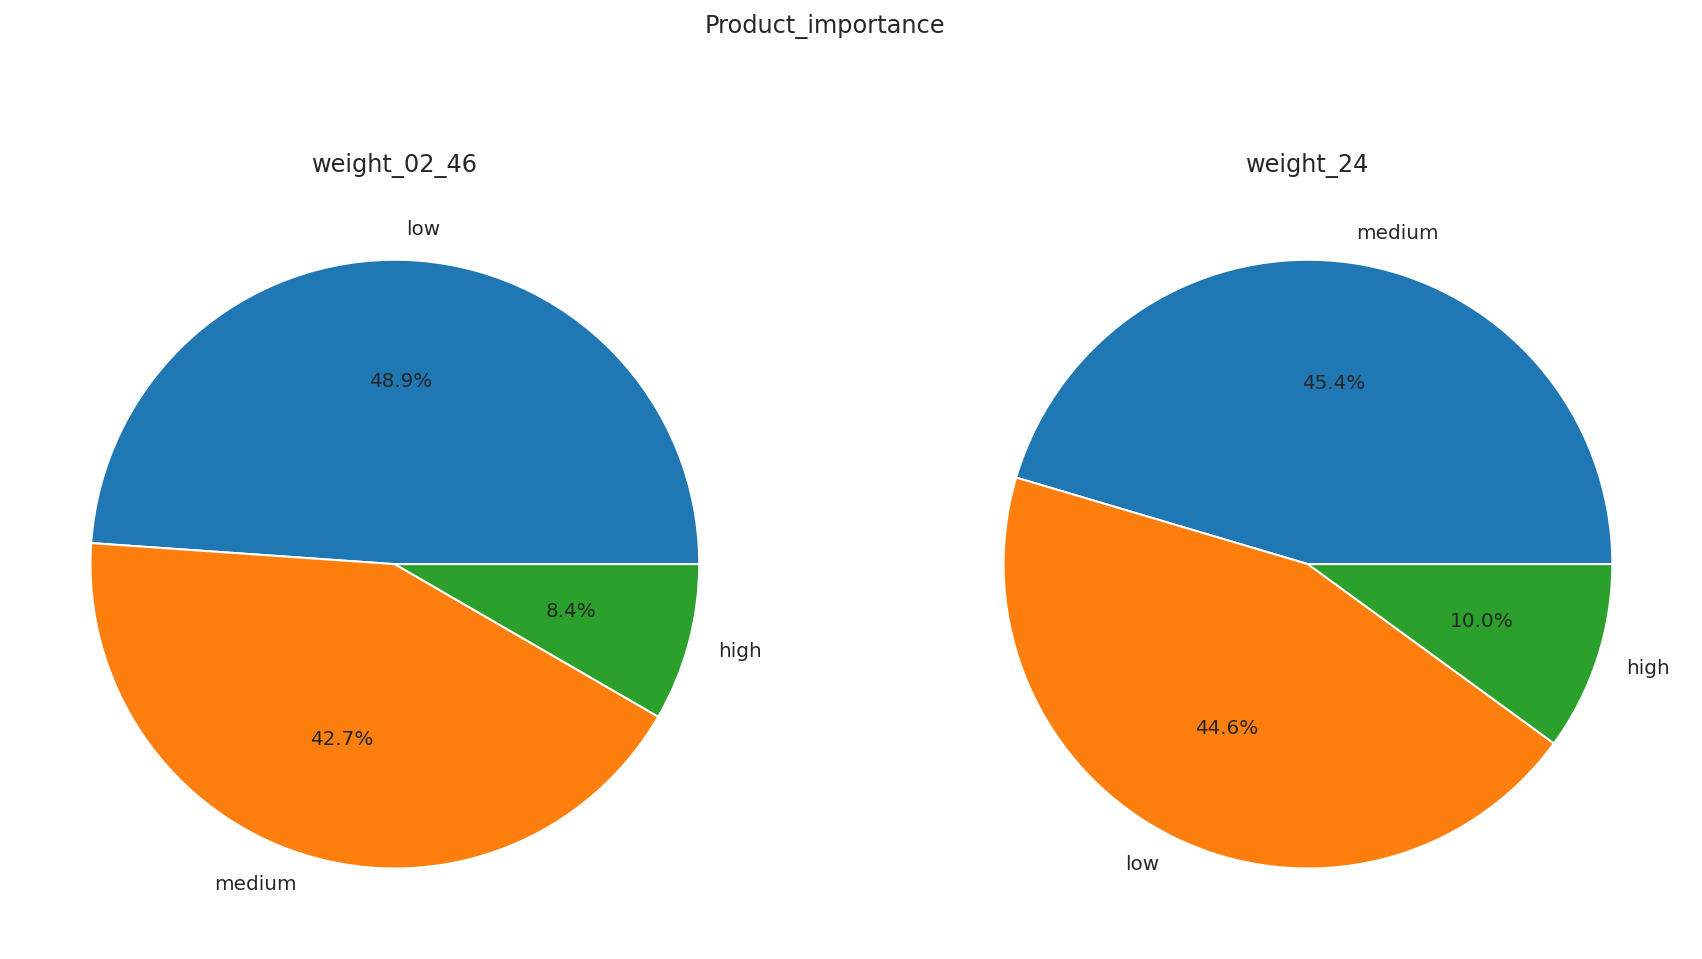

In [205]:
pie_plt('Product_importance', df_02_46, df_24)

## 지연 배송은 무게 구간에 의해서만 결정 된다.


1 = 지연 배송률 100% 구간

2 = 1이 아닌 구간

        2의 평균 지연 배송률인 약 51% 임으로 1과 2의 배송 지연률 차이는 약 49%이다.
        만약 무게구간에 의한 지연 배송률의 차이가 다른 특성에 의한 차이라면 이 49%의 차이는 다른 특성에 의한 것인데,
        1과 2이 가지는 각 특성을 비교 했을 때 평균이나 비율은 굉장히 유사 형태를 가지고 있다.
        -> 49%의 차이를 만들 만큼 극단적인 차이를 보이지 않는다.
        (검정을 통해 차이가 유의하지 않은지
         확인 하지 못해서 정확하지는 않음)


        진짜 다른 요소에 영향을 받지 않고 오로지 무게 구간에 의해서만 지연 배송률이 정해진다.
        
        -> 지연 배송률 100%인 무게구간의 물품을 처리하는 과정 자체에 문제가 있다.
        
        ex) 불균형한 인력배치 

        -> 그냥 잘 못 수집된 표본이거나, 의도적으로 만들어진 가상의 표본이다.


In [197]:
df_02_46_0.describe()

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
count,4436.000000,4436.000000,4436.000000,4436.000000,4436.000000,4436.000000,4436.0
mean,4.147656,2.967989,214.498647,3.670424,5.545987,4168.668395,0.0
std,1.162771,1.414808,47.757432,1.525444,2.877727,1573.954178,0.0
min,2.000000,1.000000,97.000000,2.000000,1.000000,1001.000000,0.0
25%,3.000000,2.000000,174.000000,3.000000,3.000000,4043.500000,0.0
50%,4.000000,3.000000,222.000000,3.000000,6.000000,4674.000000,0.0
75%,5.000000,4.000000,254.000000,4.000000,8.000000,5337.000000,0.0
max,7.000000,5.000000,310.000000,10.000000,10.000000,6000.000000,0.0


In [198]:
df_02_46_1.describe()

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
count,6555.000000,6555.000000,6555.000000,6555.000000,6555.000000,6555.000000,6555.0
mean,3.993898,3.006102,207.363539,3.498703,18.653852,3267.947826,1.0
std,1.121118,1.412905,48.035993,1.518111,19.112070,1571.186733,0.0
min,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000,1.0
25%,3.000000,2.000000,167.000000,3.000000,5.000000,1735.000000,1.0
50%,4.000000,3.000000,209.000000,3.000000,9.000000,3225.000000,1.0
75%,5.000000,4.000000,249.000000,4.000000,32.000000,4691.000000,1.0
max,7.000000,5.000000,310.000000,10.000000,65.000000,6000.000000,1.0


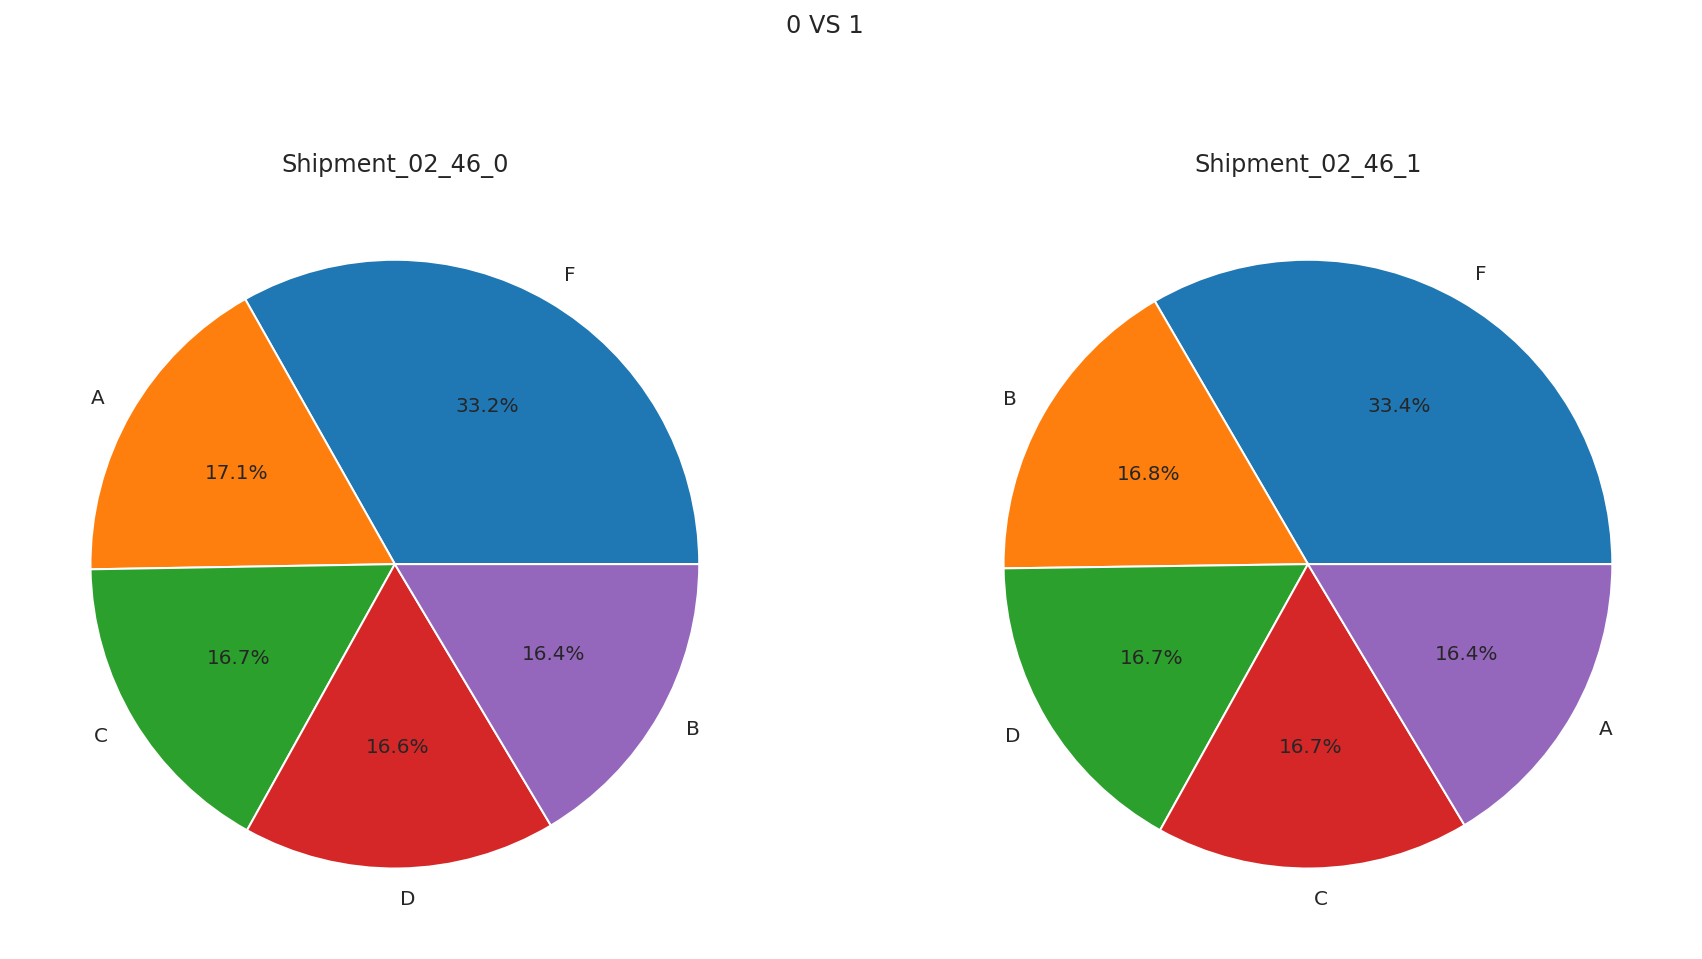

In [194]:
fig=plt.figure(figsize=(15,8))

ax_1=fig.add_subplot(121)
ratio = df_02_46_0['Warehouse_block'].value_counts(normalize=True)
ax_1.pie(ratio, labels=ratio.index, autopct='%.1f%%')
ax_1.set_title("Shipment_02_46_0")

ax_1=fig.add_subplot(122)
ratio = df_02_46_1['Warehouse_block'].value_counts(normalize=True)
ax_1.pie(ratio, labels=ratio.index, autopct='%.1f%%')
ax_1.set_title("Shipment_02_46_1")

fig.suptitle('0 VS 1')
plt.show()

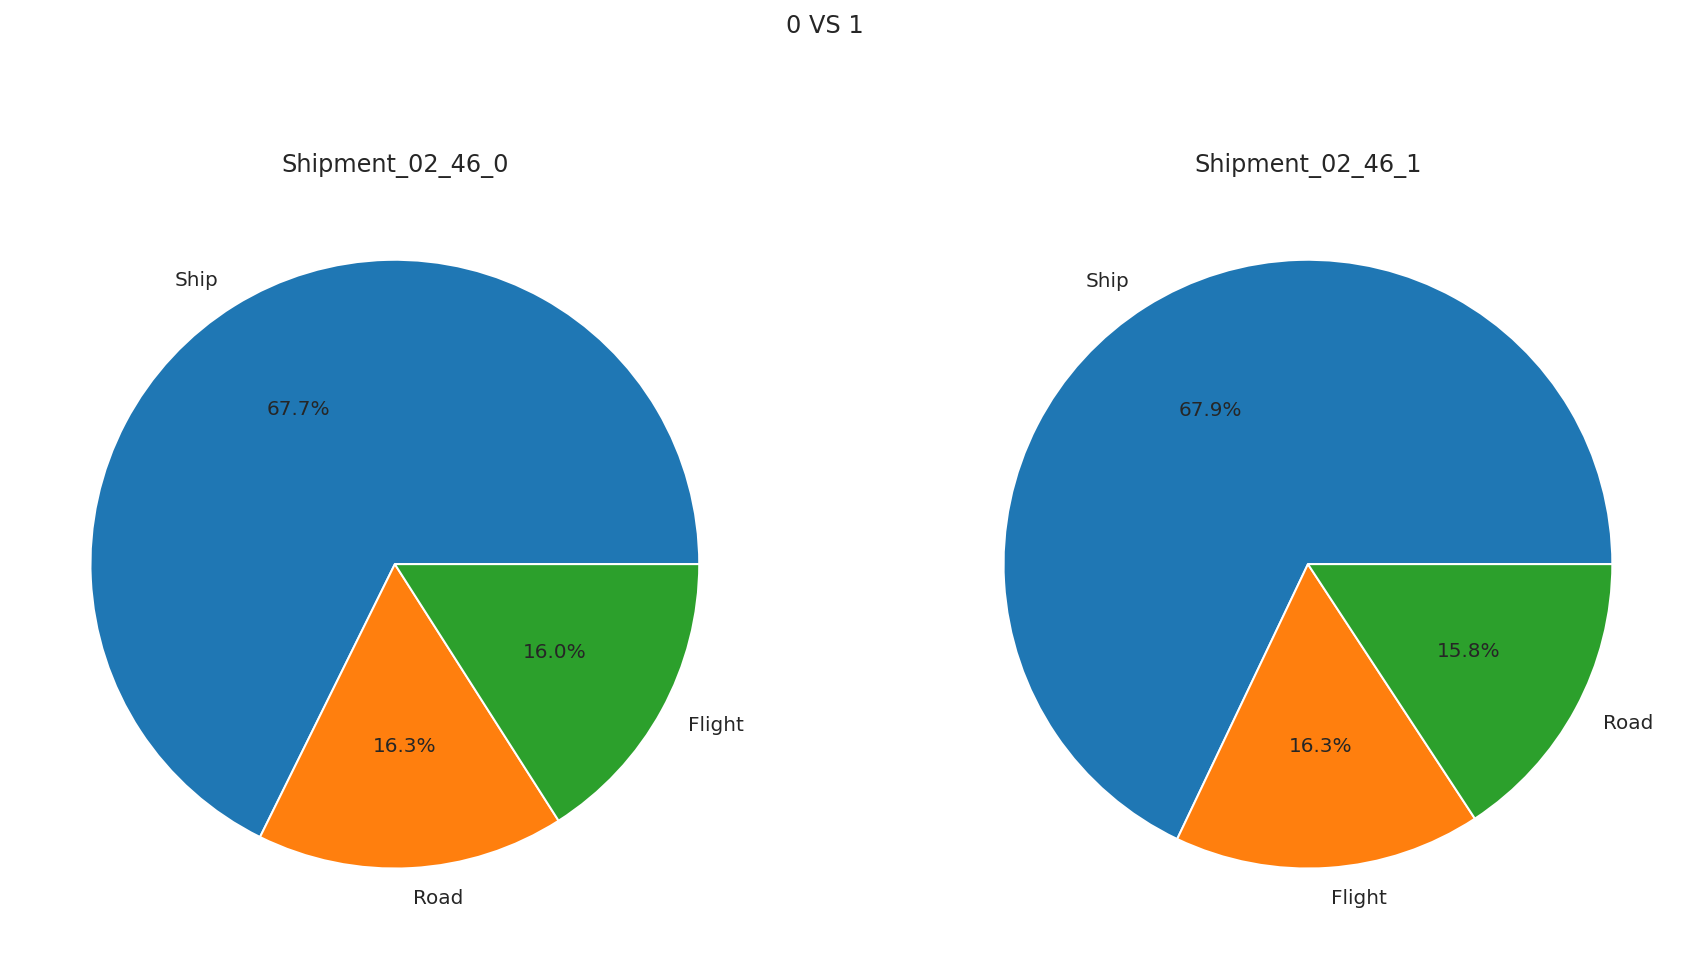

In [195]:
fig=plt.figure(figsize=(15,8))

ax_1=fig.add_subplot(121)
ratio = df_02_46_0['Mode_of_Shipment'].value_counts(normalize=True)
ax_1.pie(ratio, labels=ratio.index, autopct='%.1f%%')
ax_1.set_title("Shipment_02_46_0")

ax_1=fig.add_subplot(122)
ratio = df_02_46_1['Mode_of_Shipment'].value_counts(normalize=True)
ax_1.pie(ratio, labels=ratio.index, autopct='%.1f%%')
ax_1.set_title("Shipment_02_46_1")

fig.suptitle('0 VS 1')
plt.show()

2에 해당하는 구간을 지연 배송 유무로 나누어 비교 해봐도 결과는 비슷하다

# 결론

1. 무게 구간에 의해서 지연 배송이 100% 되는지 않되는지 나눌 수 있음

2. 무게 구간에 의해서 지연 배송이 100% 되지 않는 구간은 약 50% 확률로 지연 배송됨
        특정 지연배송 된 제품과 안 된 제품을 구분 하였을 때 'Warehouse_block' 이용 비율의 차이를 보이지 않았으며, 'Mode_of_Shipment'의 이용 비율의 차이도 없었다.
        
        무게 구간에 의해서 지연 배송이 100% 되지 않는 구간에서 'Customer_care_calls'가 높으면 지연 배송 확률이 내려가는 것으로 보아서 지연 배송 100% 구간만 아니면 문의 전화를 많이 할 수록 지연 배송 확률이 내려간다고 할 수 있다.

        'Customer_rating'는 어떤 특성에도 상관 없이 동일한 분포를 띄고 있어 의미가 없다고 판단된다.

        평균적으로 'Cost_of_the_Product'가 높아지면 지연 배송 확률이 줄어 들지만, 어떤 상관 관계가 있는지 모르겠음

        평균적으로 'Prior_purchases'가 높을 수록 지연 배송 확률이 내려가는 것은 해당 회사가 0~2000 구간과 4000~6000구간의 제품을 주로 판매 되고 있기 때문에, 
        지연배송이 100%가 아닌 구간의 재구매률이 높을 수 밖에 없다. 때문에 지연 배송 확률이 내려간다고 추측 할 수 있음

        'Product_importance' low와 medium에 비해 high의 Product_importance의 지연 배송률이 평균적으로 높아진 것으로 보았을 때 
        제품 중요도에 따른 배송 프로세스가 다르다고 추측 할 수 있다.
        
        'Gender'는 지연 배송 유무와 상관 없이 50에 근사한 비율을 보인다.
        지연 배송과는 상관관계가 없다.

        'Discount_offered'는 지연 배송 되는 확률과 연관이 없다.
        단지 지연 배송이 되면 할인을 해줄 뿐

잘 못 수집된 표본이거나, 의도적으로 만들어진 가상의 표본이 아니라면,

2000\~3999g, 6000~7999 무게 구간을 처리하는 배송 시스템에 문제가 있으며 해결 해야 한다.


특정 무게구간 아니면 약 50% 확률로 정시 배송 받을 수 있으며, 전화 많이 하고 진상 부리면 빨리 배달해준다

# 피드백 받고 싶은 부분?
1. 수치적 검정이 아니라 직관을 통해서 내린 결론이라 정확한 근거를 제시 하지 못 했는데 어떤 검정을 하면 좋을지
-> t-test를 하기 위해서 정규성, 등분산성 검정을 하였지만 조건에 맞지 않았음
(정확히는 검정 방법에 따라 결과가 다르게 나왔음)

-> Reached.on.Time_Y.N를 기준으로 0인 것과 1인 것으로 나누어 t-test를 진행하려 하였는데,

그럼 공통적인 특성에서 나온 각 변수를 독립적으로 보고 two-sample t-test를 진행 해야 할지,

독립적이지 않다고 보고 paired t-test를 진행 해야하는지

비율의 차이를 어떻게 검정 하는 것이 좋을지

2. 변수 이름과 상황에 맞는 plot

lineplot과 pieplot만으로 시각화를 진행 하였는데, 더 좋은 시각화 표현 방법이 있는가?

변수 이름 지정과 플롯 타이틀 네이밍 팁이 있다면 알려주셨으면 합니다.

3. 구성이나 주석이 지저분 하다고 생각 되는데 어떤 논리적 흐름과 접근으로 깔끔하게 정리하는지